In [24]:
import pandas as pd
import numpy as np

from collections import Counter
import time
import re
import matplotlib.pyplot as plt

from datetime import datetime, timezone

In [2]:
corpus = pd.read_csv('Analysts.csv')

In [3]:
corpus.shape

(1175, 6)

In [4]:
corpus.head(2)

,id,text,mes_date,views,mes_title,mes_description
0,1214,🔹IT аналитик\n🔹Бизнес-аналитик\nв новый fintec...,2019-10-15 08:01:05+00:00,493.0,None,None
1,1213,Вакансии в FoodPlex\n🔹Data Engineer\n🔹Data Ana...,2019-10-14 14:01:04+00:00,832.0,None,None


In [5]:
corpus.mes_date = pd.to_datetime(corpus.mes_date)
corpus = corpus[['id', 'text', 'mes_date', 'views', 'mes_title', 'mes_description']]
corpus.text = corpus.text.fillna('').astype(str)

def remove_links_and_quotes(text):
    try:
        return ' '.join([word for word in text.split() if 'http' not in word and '@' not in word])
    except:
        pass
corpus.text = corpus.text.apply(lambda x: remove_links_and_quotes(x))
corpus.mes_title = corpus.mes_title.apply(lambda x: remove_links_and_quotes(x))
corpus.mes_description = corpus.mes_description.apply(lambda x: remove_links_and_quotes(x))
corpus.fillna('', inplace=True)

corpus = corpus[corpus.text.apply(lambda x: len(x) > 0)]
corpus.text = corpus.text.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.mes_title = corpus.mes_title.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.mes_description = corpus.mes_description.apply(lambda x: ' '.join(re.split('\W+', x.lower())))
corpus.sort_values('mes_date', inplace=True, ascending=True)

corpus.head(10)

,id,text,mes_date,views,mes_title,mes_description
1173,2,вакансия минск product analyst data analyst в...,2017-10-27 15:10:29+00:00,337,product analyst data analyst карьера wargaming,отличная вакансия в wargaming здесь ценят хоро...
1172,3,вакансия москва product mob ile analyst ламод...,2017-10-27 15:19:43+00:00,357,вакансия product mob ile analyst в москве рабо...,вакансия product mob ile analyst зарплата не у...
1171,4,конференция москва спец конфа аналитика для а...,2017-10-30 09:11:18+00:00,388,встреча аналитиков data driven 2 декабря 2017 ...,события вся информация о конференциях школах с...
1170,5,вакансия аналитик москва аналитик в мел отлич...,2017-10-30 09:18:06+00:00,435,nikita belogolovcev,всем привет немного отличных вакансий от вашег...
1169,6,вакансия москва data analyst в social discove...,2017-10-30 09:52:28+00:00,478,anna denshchikova,всем привет у нас в social discovery ventures ...
1168,7,вакансия москва аналитик клиентского с ервиса...,2017-10-30 11:04:43+00:00,830,вакансия аналитик клиентского с ервиса deliver...,вакансия аналитик клиентского с ервиса deliver...
1167,8,вакансия москва бизнес аналитик в наш любимый...,2017-10-31 10:14:11+00:00,2509,вакансия business analyst бизнес аналитик в мо...,вакансия business analyst бизнес аналитик зарп...
1166,9,вакансия москва junior digital аналитик в тел...,2017-10-31 16:29:14+00:00,586,вакансия web marketing specialist спец иалист ...,вакансия web marketing specialist спец иалист ...
1165,10,вакансия москва 2 горяченькие вакансии в whee...,2017-11-01 12:50:47+00:00,884,job opening data analyst at wheely,job opening data analyst at wheely apply at wo...
1164,11,вакансия москва продуктовый аналитик в cian р...,2017-11-02 08:49:03+00:00,1720,вакансия продуктовый аналитик в москве работа ...,вакансия продуктовый аналитик зарплата не указ...


In [6]:
corpus.tail(10)

,id,text,mes_date,views,mes_title,mes_description
9,1204,запускаем сразу два подкаста для data scienti...,2019-10-10 10:01:05+00:00,1288,,
8,1205,системный аналитик тестировщик в лабораторию з...,2019-10-10 14:01:03+00:00,1216,none,none
7,1207,product analyst в нетологию один из крупнейших...,2019-10-11 08:30:25+00:00,1116,none,none
6,1208,attention у нас классная новость для вас нам ...,2019-10-11 10:01:04+00:00,1288,,
5,1209,product analyst в мегафон бизнес москва описан...,2019-10-11 12:01:05+00:00,1384,none,none
4,1210,head of data science в profi ru it компания ра...,2019-10-11 14:01:07+00:00,1558,none,none
3,1211,системный аналитик в opendev компания ориентир...,2019-10-14 08:01:04+00:00,920,none,none
2,1212,что нужно делать чтобы зарабатывать в два раз...,2019-10-14 10:01:05+00:00,941,,
1,1213,вакансии в foodplex data engineer data analyst...,2019-10-14 14:01:04+00:00,832,none,none
0,1214,it аналитик бизнес аналитик в новый fintech с...,2019-10-15 08:01:05+00:00,493,none,none


In [7]:
corpus.to_csv('Analysts_preproc.csv', index=None)

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_me(file_text):
    #firstly let's apply nltk tokenization
    tokens = nltk.word_tokenize(file_text)

    #drop stop_words
    stop_words = stopwords.words('russian')
    stop_words.extend(['вакансия','москва','что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'за', 'было','требуемые','навыки','ищет', 
                       'удалённо', 'специалиста', 'компания', 'откликаться', 'geekjob','описание','вакансии','ru','её','пост','санкт-петербург',
                       'санкт петербург','минск','личку','санкт', 'петербург', 'санктпетербург','оксана','прутьянова','подробнее'])
    stop_words.extend(stopwords.words('english'))
    tokens = [i for i in tokens if ( i not in stop_words )]
    
    #cleaning words
    tokens = [i.replace("«", "").replace("»", "") for i in tokens]

    return ' '.join(tokens)

corpus.text = corpus.text.apply(lambda x: tokenize_me(x))
corpus.head(10)

corpus.to_csv('Analysts_tokens.csv', index=None)

[nltk_data] Downloading package punkt to /home/renat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/renat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from wordcloud import WordCloud

In [10]:
corpus.head(2)

,id,text,mes_date,views,mes_title,mes_description
1173,2,product analyst data analyst варгейминг ищем к...,2017-10-27 15:10:29+00:00,337,product analyst data analyst карьера wargaming,отличная вакансия в wargaming здесь ценят хоро...
1172,3,product mob ile analyst ламода смотрите хх вак...,2017-10-27 15:19:43+00:00,357,вакансия product mob ile analyst в москве рабо...,вакансия product mob ile analyst зарплата не у...


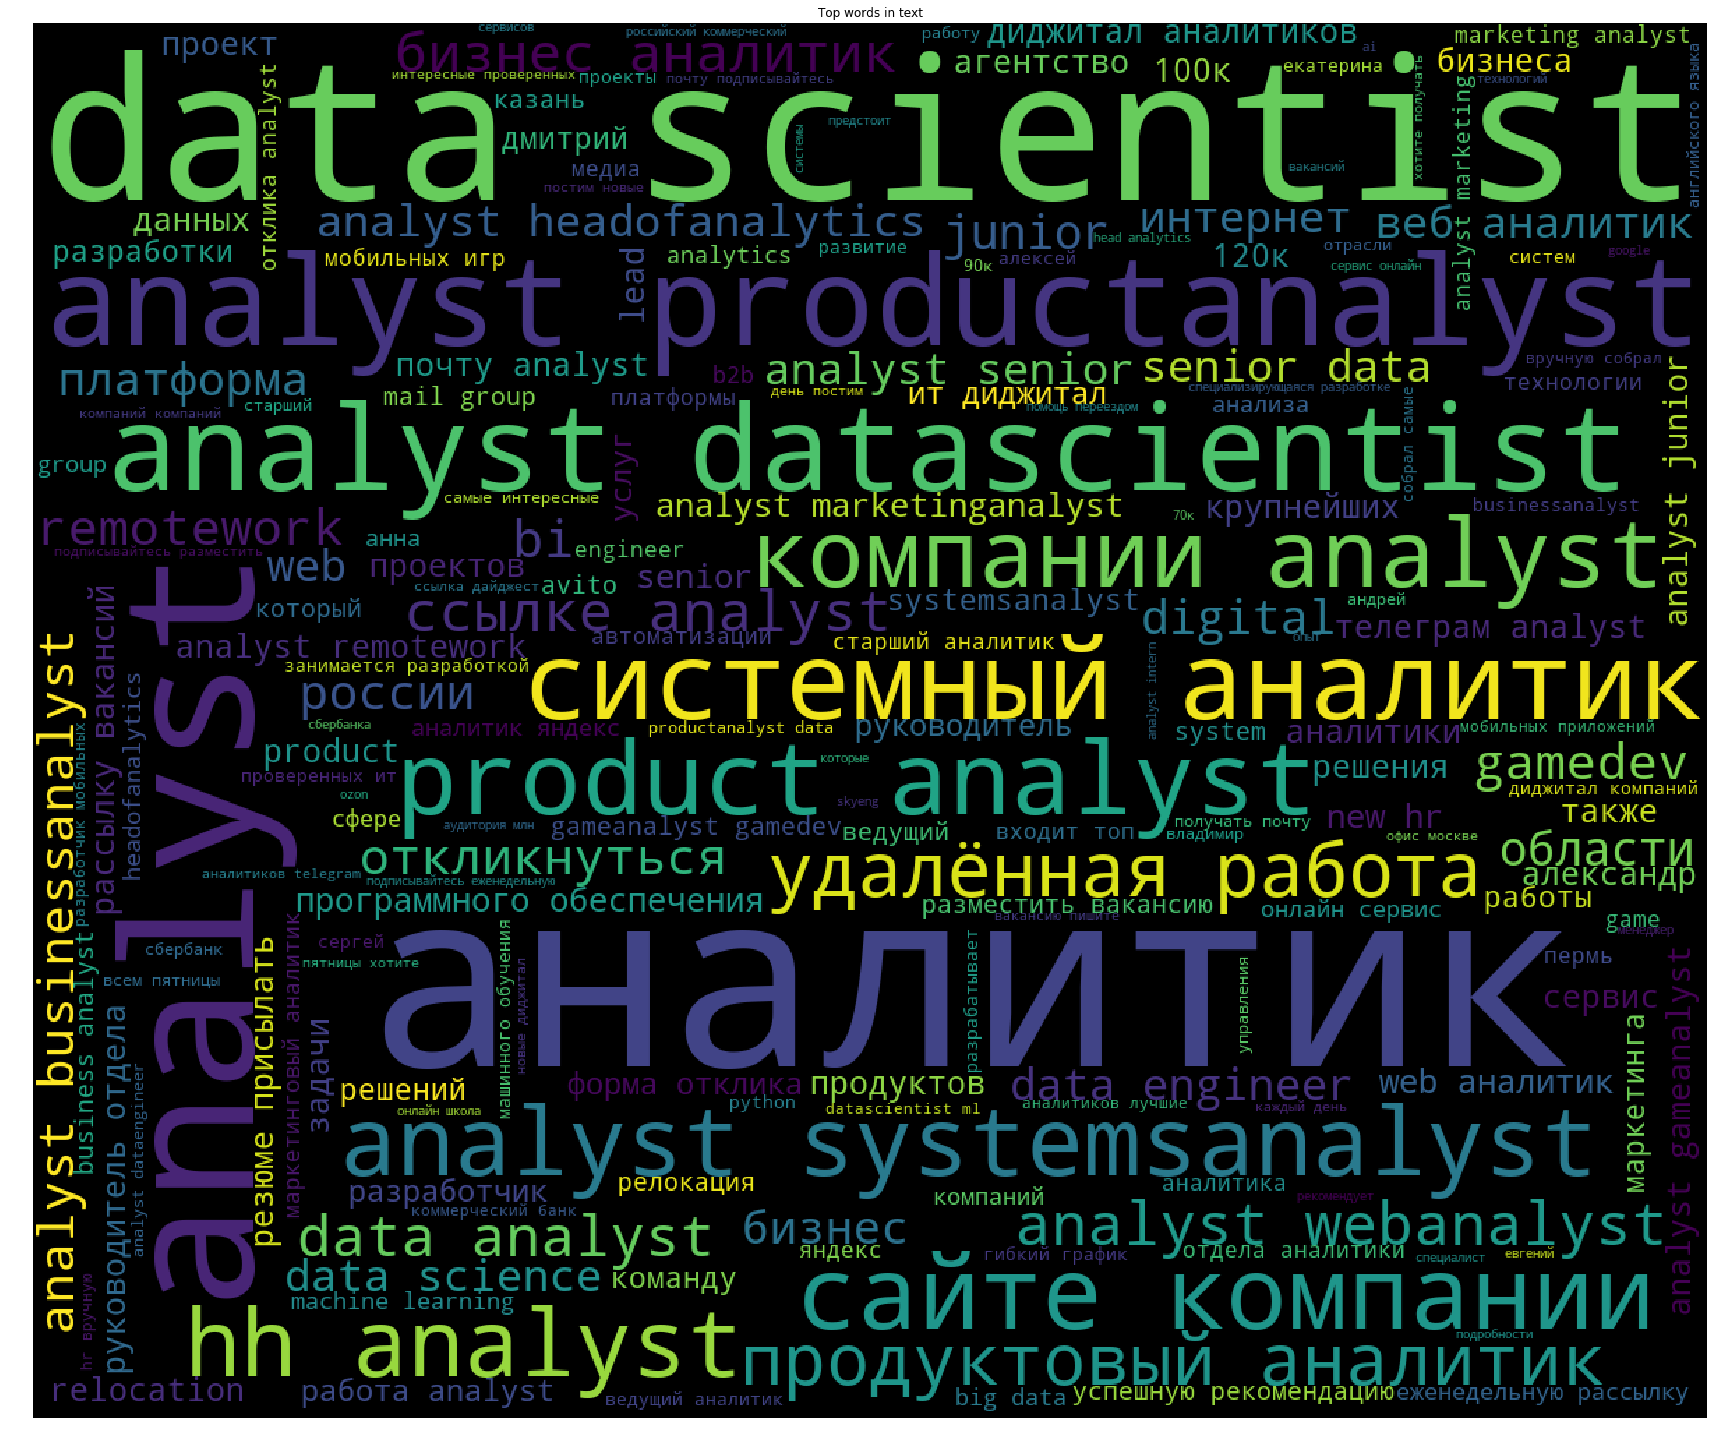

In [11]:
text = ' '.join(corpus['text'])
wordcloud = WordCloud(max_font_size=None, background_color='black',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.title('Top words in text')
plt.axis("off")
plt.show()

In [12]:
corpus.text

1173    product analyst data analyst варгейминг ищем к...
1172    product mob ile analyst ламода смотрите хх вак...
1171    конференция спец конфа аналитика аналитиков вс...
1170    аналитик аналитик мел отличный образовательный...
1169    data analyst social discovery ventures ключевы...
1168    аналитик клиентского ервиса delivery club дели...
1167    бизнес аналитик наш любимый едадил одна немног...
1166    junior digital аналитик теле2 очень хорошая ис...
1165    2 горяченькие wheely команду data science data...
1164    продуктовый аналитик cian редкая прийти c нуля...
1163    кипр кажется самая актуальная учетом погоды ок...
1162    вьетнам продолжаем подборку вакансий теплых ст...
1161    analyst developers ruby react designer несколь...
1160    product analyst designer сразу несколько вакан...
1159    analyst редкая бизнес системных аналитиков янд...
1158    вакансияnewhr senior product analyst senior pr...
1157    analyst 2 аналитиков bookmate head analytics с...
1156    analys

In [13]:
corpus.groupby('mes_title')['text'].count().sort_values(ascending=False).head(20)

mes_title
none                                                                                     1130
                                                                                           11
подписка на вакансии для аналитиков и data scientists                                       2
23 вакансии для аналитиков                                                                  1
anna denshchikova                                                                           1
cốc cốc about us                                                                            1
daidzhiest vakansii dlia digital analitikov s 16 po 24 aprielia                             1
eugene gapon                                                                                1
job opening data analyst at wheely                                                          1
new hr podcast венчур по понятиям с алмасом абулхаировым                                    1
nikita belogolovcev                               

In [14]:
total_history = corpus['mes_date'].dt.date.sort_values()

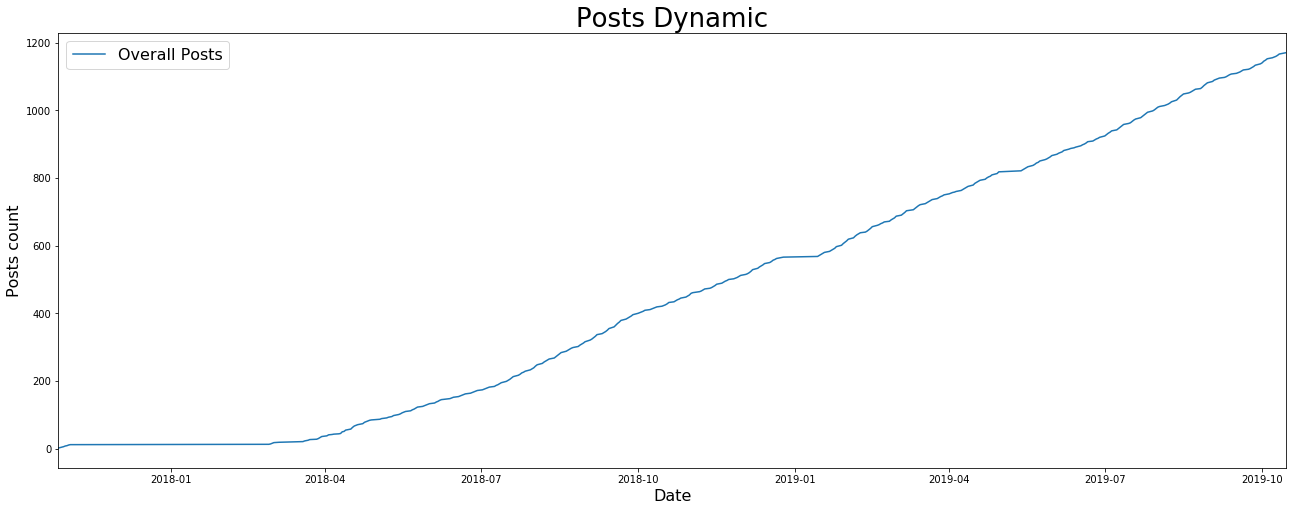

In [15]:
%matplotlib inline
import matplotlib.pylab as plt
plt.title('Posts Dynamic', fontsize=26)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Posts count', fontsize=16)
total_history.value_counts().sort_index().cumsum().plot(figsize=(22,8), label='Overall Posts')
plt.legend(fontsize=16)
plt.savefig('allposts.png', fps=150)

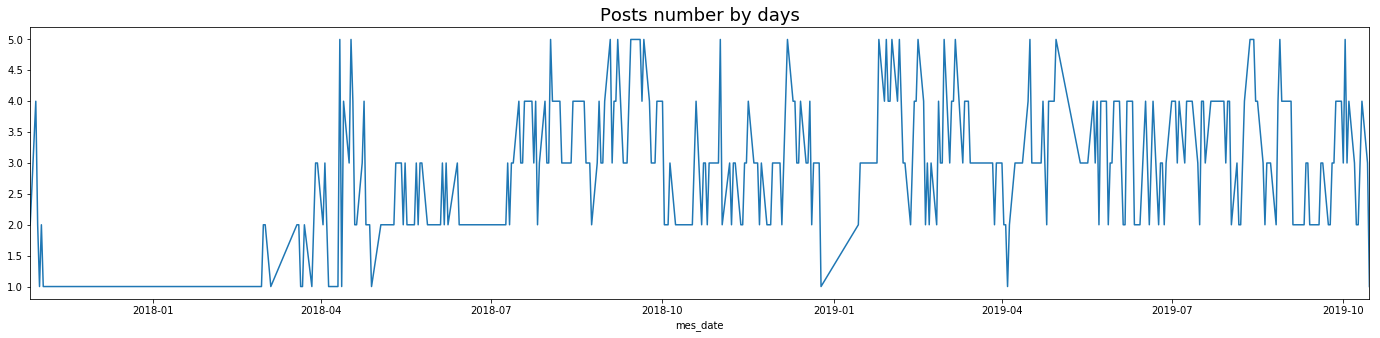

In [16]:
import matplotlib.pylab as plt
%matplotlib inline

corpus.groupby(corpus.mes_date.dt.date).count().mes_date.plot(figsize=(24,5))
plt.title('Posts number by days', fontsize=18)
plt.savefig('by date.png', fps=400)

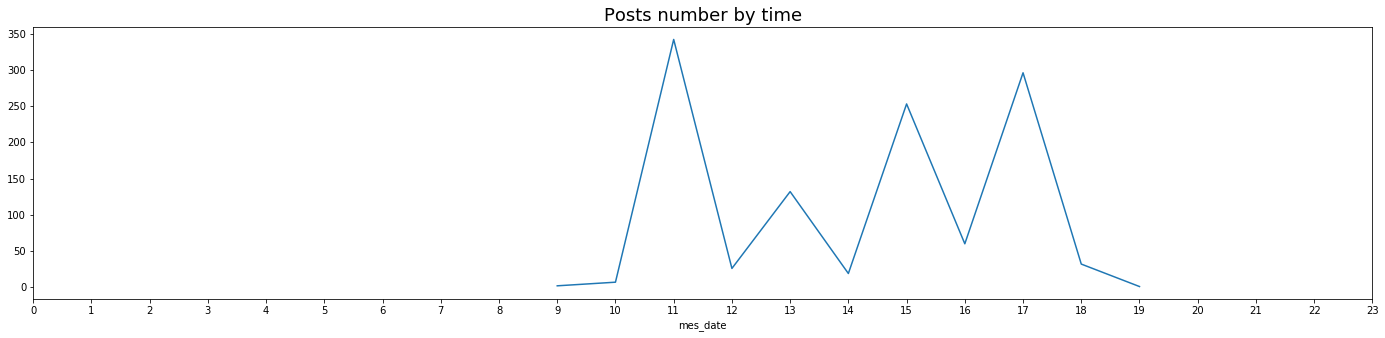

In [35]:
#corpus.groupby(corpus.mes_date.dt.hour).count().mes_date.plot(figsize=(24,5))
corpus.groupby(corpus.mes_date.dt.tz_convert('Europe/Moscow').dt.hour).count().mes_date.plot(figsize=(24,5))

plt.title('Posts number by time', fontsize=18)
plt.xticks(range(24))
plt.savefig('by hours Moscow.png', fps=400)
plt.show()

In [37]:
total_views = pd.pivot_table(corpus, values = 'views', columns=['mes_date'], aggfunc=np.sum).T
#total_views = total_views.reset_index(drop=True)['mes_date'].dt.date.sort_values()
#total_views.head(2)

In [38]:
total_views = total_views.reset_index()
total_views.head(2)

,mes_date,views
0,2017-10-27 15:10:29+00:00,337.0
1,2017-10-27 15:19:43+00:00,357.0


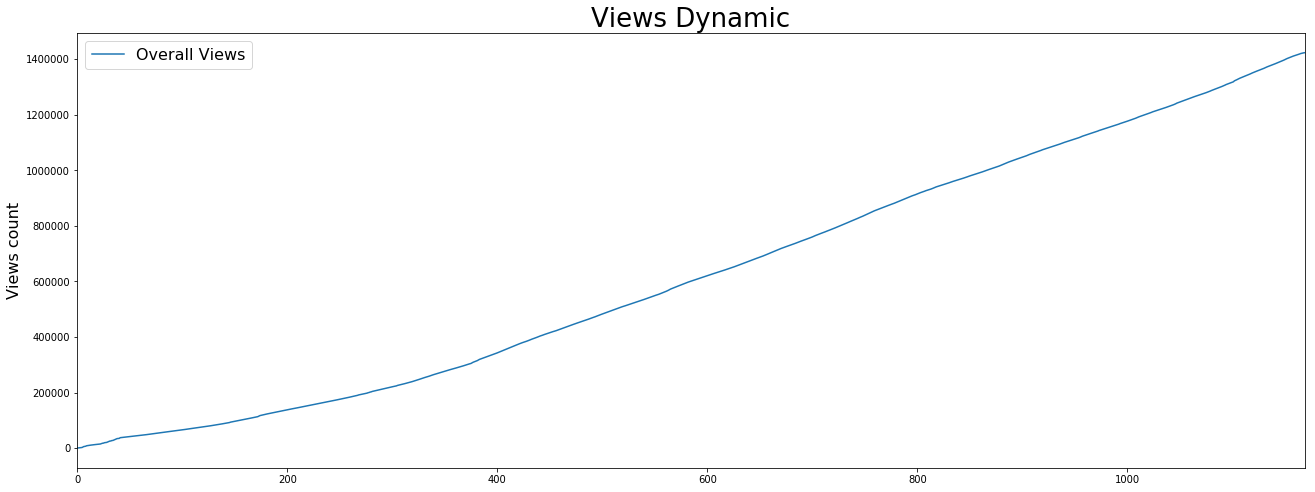

In [39]:
%matplotlib inline
import matplotlib.pylab as plt
plt.title('Views Dynamic', fontsize=26)
plt.ylabel('Views count', fontsize=16)
total_views.views.cumsum().plot(figsize=(22,8), label='Overall Views')
plt.legend(fontsize=16)
plt.savefig('allViews.png', fps=150)

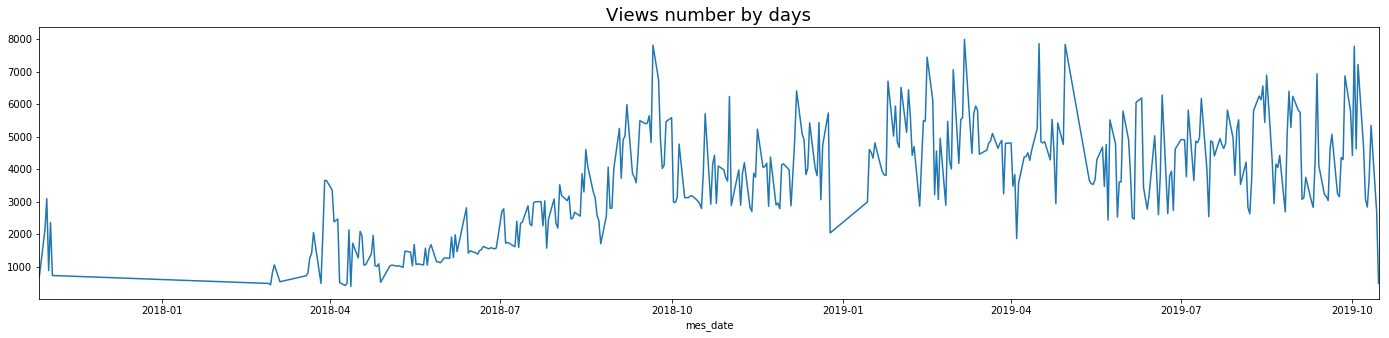

In [40]:
import matplotlib.pylab as plt
%matplotlib inline

total_views.groupby(total_views.mes_date.dt.date).views.sum().plot(figsize=(24,5))
plt.title('Views number by days', fontsize=18)
plt.savefig('views by date.png', fps=400)

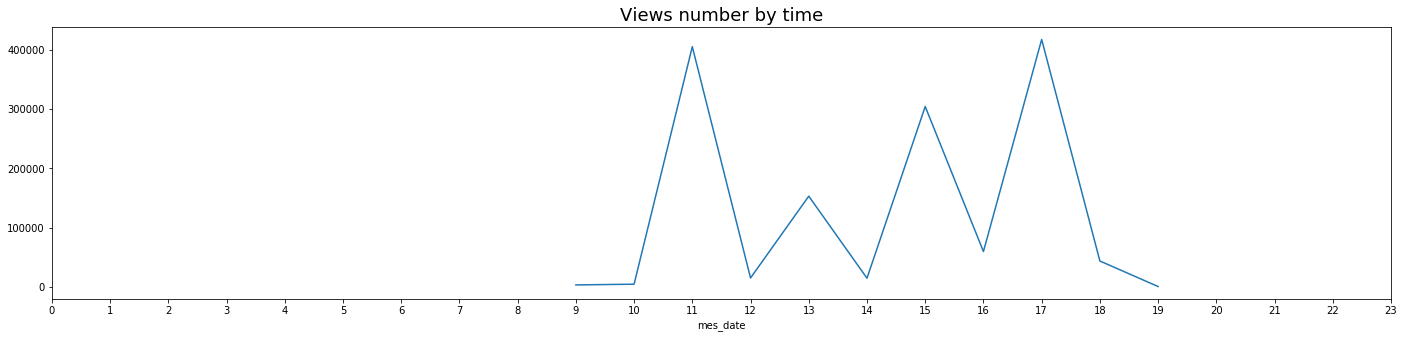

In [42]:
#total_views.groupby(total_views.mes_date.dt.hour).views.sum().plot(figsize=(24,5))
total_views.groupby(total_views.mes_date.dt.tz_convert('Europe/Moscow').dt.hour).views.sum().plot(figsize=(24,5))
plt.title('Views number by time', fontsize=18)
plt.xticks(range(24))
plt.savefig('Views by hours Moscow.png', fps=400)
plt.show()

In [23]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

def get_words_by_threshold_report(text_series, min_df=0.02, max_df=0.75):
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)

    counts = vectorizer.fit_transform(text_series)
    corpus_id2word = {value: key for key, value in vectorizer.vocabulary_.items()}

    print('Words in dictionary: {}\n'.format(counts.shape[1]))
    print('Dictionary before threshold filtration: ', Counter(' '.join(text_series.values).split()).most_common(20), '\n')

    print('Words under top threshold:   ', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[-40:][::-1]])
    print()
    print('Words upper bottom threshold:', [corpus_id2word[elem] for elem in np.argsort(np.array(counts.sum(axis=0)).ravel())[:20]])
    return counts, vectorizer, corpus_id2word

def get_lda_model(counts, corpus_id2word, num_topics=10, alpha_value=0.1, var_iter=50, passes=50):
    gensim_corpus = gensim.matutils.Scipy2Corpus(counts)
    t_start = time.time()
    lda = gensim.models.LdaModel(
        corpus=gensim_corpus,
        passes=passes,
        num_topics=num_topics,
        alpha=[alpha_value] * num_topics,
        iterations=var_iter,
        id2word=corpus_id2word,
        eval_every=0,
        random_state=42
    )
    current_score = lda.bound(gensim_corpus)
    time_ellapsed = int(time.time() - t_start)

    print('ELBO = {1:.4f}, time: {2} seconds'.format(
        alpha_value, current_score, time_ellapsed))
    
    gamma, _ = lda.inference(gensim_corpus)
    gamma = gamma / gamma.sum(1).reshape(-1, 1)
    
    return lda, gamma

def build_topic_words_report(lda, top_words_num=25, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    topic_space = max(map(len, topic_names)) + 2
    
    if topic_space==2:
        for topic_index in range(lda.num_topics):
            print('{0} topic: {1}'.format(
                topic_index, ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        return
    
    for topic_index in range(lda.num_topics):
        print('{0} topic :{1: ^{2}}: {3}'.format(
            topic_index, topic_names[topic_index], topic_space,
            ', '.join(list(zip(*lda.show_topic(topic_index, topn=top_words_num)))[0])))
        
def build_topic_subjects_report(lda, gamma, text_series, topic_names=None):
    if topic_names==None:
        topic_names = [''] * lda.num_topics
    for topic_index in range(lda.num_topics):
        print('Topic {0} - {1}'.format(topic_index, topic_names[topic_index]))
        best_doc_indexes = gamma[:, topic_index].argsort()[-10:][::-1]
        
        subjects_with_proba = []
        for person_count, doc in enumerate(best_doc_indexes):
            if gamma[doc, topic_index] > 0.01 or person_count<3:
                subjects_with_proba.append('{0} - {1:.1%}'.format(text_series.index[doc], gamma[doc, topic_index]))
        print(', '.join(subjects_with_proba), '\n')

In [24]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.05, max_df=0.85)

Words in dictionary: 34

Dictionary before threshold filtration:  [('analyst', 1357), ('аналитик', 683), ('data', 368), ('productanalyst', 158), ('scientist', 153), ('datascientist', 151), ('компании', 146), ('senior', 145), ('сервис', 144), ('онлайн', 130), ('product', 126), ('системный', 108), ('systemsanalyst', 108), ('россии', 105), ('бизнес', 99), ('разработчик', 99), ('сайте', 93), ('remotework', 93), ('hh', 92), ('компаний', 91)] 

Words under top threshold:    ['аналитик', 'data', 'productanalyst', 'scientist', 'datascientist', 'компании', 'senior', 'сервис', 'онлайн', 'product', 'системный', 'systemsanalyst', 'россии', 'разработчик', 'бизнес', 'сайте', 'remotework', 'hh', 'компаний', 'работа', 'мобильных', 'webanalyst', 'ссылке', 'удалённая', 'интернет', 'продуктовый', 'businessanalyst', 'откликнуться', 'платформа', 'gamedev', 'веб', 'web', 'яндекс', 'аналитики']

Words upper bottom threshold: ['аналитики', 'яндекс', 'web', 'веб', 'gamedev', 'платформа', 'откликнуться', 'busin

In [25]:
lda_norm, gamma_norm = get_lda_model(counts, corpus_id2word, num_topics=5)

ELBO = -13765.3937, time: 7 seconds


In [26]:
build_topic_words_report(lda_norm, top_words_num=15)

0 topic: аналитик, бизнес, webanalyst, businessanalyst, web, веб, интернет, яндекс, ссылке, hh, откликнуться, аналитики, сервис, онлайн, россии
1 topic: data, scientist, datascientist, компании, сайте, компаний, senior, аналитики, сервис, россии, яндекс, ссылке, интернет, платформа, онлайн
2 topic: аналитик, онлайн, сервис, productanalyst, hh, продуктовый, откликнуться, product, компании, data, ссылке, платформа, senior, datascientist, веб
3 topic: product, remotework, работа, productanalyst, удалённая, россии, senior, платформа, data, онлайн, компаний, ссылке, интернет, аналитик, сервис
4 topic: аналитик, системный, systemsanalyst, разработчик, мобильных, gamedev, ссылке, компании, веб, senior, аналитики, интернет, платформа, data, бизнес


In [27]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.025, max_df=0.45)
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

Words in dictionary: 95

Dictionary before threshold filtration:  [('analyst', 1357), ('аналитик', 683), ('data', 368), ('productanalyst', 158), ('scientist', 153), ('datascientist', 151), ('компании', 146), ('senior', 145), ('сервис', 144), ('онлайн', 130), ('product', 126), ('системный', 108), ('systemsanalyst', 108), ('россии', 105), ('бизнес', 99), ('разработчик', 99), ('сайте', 93), ('remotework', 93), ('hh', 92), ('компаний', 91)] 

Words under top threshold:    ['data', 'productanalyst', 'scientist', 'datascientist', 'компании', 'senior', 'сервис', 'онлайн', 'product', 'системный', 'systemsanalyst', 'россии', 'бизнес', 'разработчик', 'сайте', 'remotework', 'hh', 'компаний', 'работа', 'мобильных', 'аналитиков', 'webanalyst', 'junior', 'ссылке', 'продуктовый', 'businessanalyst', 'удалённая', 'интернет', 'платформа', 'откликнуться', 'web', 'gamedev', 'веб', 'яндекс', 'аналитики', 'group', 'вакансий', 'ведущий', 'диджитал', 'headofanalytics']

Words upper bottom threshold: ['крупней

In [28]:
build_topic_words_report(
    lda_norm_45, top_words_num=14,
    topic_names=['data scientist', 'game dev', 'marketing analyst', 'product analyst', 'business analyst'] * 5)

0 topic :  data scientist   : data, scientist, datascientist, senior, сервис, россии, ml, science, онлайн, компании, откликнуться, крупнейший, проект, relocation
1 topic :     game dev      : аналитики, headofanalytics, руководитель, банк, сервис, рынка, analytics, услуг, российский, отдела, данных, задачи, проект, head
2 topic : marketing analyst : системный, systemsanalyst, бизнес, web, webanalyst, businessanalyst, агентство, интернет, веб, почту, решений, digital, разработчик, области
3 topic :  product analyst  : компаний, компании, яндекс, сайте, аналитиков, диджитал, hr, new, ит, вакансий, mail, marketinganalyst, сервис, group
4 topic : business analyst  : productanalyst, product, remotework, работа, мобильных, junior, удалённая, продуктовый, gamedev, data, разработчик, онлайн, engineer, игр


In [29]:
build_topic_subjects_report(lda_norm_45, gamma_norm_45, corpus['text'])

Topic 0 - 
322 - 97.2%, 149 - 96.5%, 390 - 96.5%, 197 - 96.5%, 133 - 96.5%, 346 - 96.5%, 250 - 96.5%, 315 - 96.5%, 744 - 96.2%, 932 - 96.2% 

Topic 1 - 
108 - 97.2%, 245 - 96.2%, 423 - 95.8%, 972 - 95.8%, 1120 - 95.3%, 921 - 94.7%, 938 - 94.7%, 543 - 94.7%, 427 - 94.7%, 400 - 94.7% 

Topic 2 - 
670 - 96.2%, 581 - 95.8%, 929 - 95.8%, 772 - 95.8%, 672 - 95.8%, 823 - 95.3%, 911 - 95.3%, 424 - 95.3%, 377 - 95.3%, 1064 - 95.3% 

Topic 3 - 
88 - 97.6%, 853 - 97.4%, 555 - 97.2%, 773 - 97.2%, 419 - 97.2%, 487 - 97.2%, 934 - 97.0%, 249 - 97.0%, 999 - 97.0%, 303 - 97.0% 

Topic 4 - 
833 - 96.2%, 814 - 95.8%, 857 - 95.8%, 525 - 95.8%, 874 - 95.8%, 58 - 95.3%, 865 - 95.3%, 1058 - 95.3%, 279 - 95.3%, 60 - 95.3% 



In [30]:
week_text = corpus.groupby(corpus.mes_date.apply(lambda x: '{1}-{0}'.format(x.week, x.year))).agg(lambda x: ' '.join(x))['text']
print(week_text.shape)
week_text.head()

(84,)


mes_date
2017-43    product analyst data analyst варгейминг ищем к...
2017-44    конференция спец конфа аналитика аналитиков вс...
2018-10    analyst gamedev аналитик маркетинга мобильных ...
2018-12    analyst director директор аналитике инстамарт ...
2018-13    developers analyst students internship стажиро...
Name: text, dtype: object

In [31]:
morph = pymorphy2.MorphAnalyzer()
week_text_filter = week_text
week_text_filter.head()

mes_date
2017-43    product analyst data analyst варгейминг ищем к...
2017-44    конференция спец конфа аналитика аналитиков вс...
2018-10    analyst gamedev аналитик маркетинга мобильных ...
2018-12    analyst director директор аналитике инстамарт ...
2018-13    developers analyst students internship стажиро...
Name: text, dtype: object

In [32]:
counts, vectorizer, corpus_id2word = get_words_by_threshold_report(corpus['text'], min_df=0.025, max_df=0.45)

Words in dictionary: 95

Dictionary before threshold filtration:  [('analyst', 1357), ('аналитик', 683), ('data', 368), ('productanalyst', 158), ('scientist', 153), ('datascientist', 151), ('компании', 146), ('senior', 145), ('сервис', 144), ('онлайн', 130), ('product', 126), ('системный', 108), ('systemsanalyst', 108), ('россии', 105), ('бизнес', 99), ('разработчик', 99), ('сайте', 93), ('remotework', 93), ('hh', 92), ('компаний', 91)] 

Words under top threshold:    ['data', 'productanalyst', 'scientist', 'datascientist', 'компании', 'senior', 'сервис', 'онлайн', 'product', 'системный', 'systemsanalyst', 'россии', 'бизнес', 'разработчик', 'сайте', 'remotework', 'hh', 'компаний', 'работа', 'мобильных', 'аналитиков', 'webanalyst', 'junior', 'ссылке', 'продуктовый', 'businessanalyst', 'удалённая', 'интернет', 'платформа', 'откликнуться', 'web', 'gamedev', 'веб', 'яндекс', 'аналитики', 'group', 'вакансий', 'ведущий', 'диджитал', 'headofanalytics']

Words upper bottom threshold: ['крупней

In [33]:
lda_norm_45, gamma_norm_45 = get_lda_model(counts, corpus_id2word, num_topics=5)

ELBO = -26868.9822, time: 8 seconds


In [133]:
build_topic_words_report(
    lda_norm_45, top_words_num=14,
    topic_names=['data scientist', 'руководители', 'system analyst', 'product analyst', 'product analyst'] * 5)

0 topic :  data scientist  : data, scientist, datascientist, senior, сервис, россии, ml, science, онлайн, компании, откликнуться, крупнейший, проект, relocation
1 topic :   руководители   : аналитики, headofanalytics, руководитель, банк, сервис, рынка, analytics, услуг, российский, отдела, данных, задачи, проект, head
2 topic :  system analyst  : системный, systemsanalyst, бизнес, web, webanalyst, businessanalyst, агентство, интернет, веб, почту, решений, digital, разработчик, области
3 topic : product analyst  : компаний, компании, яндекс, сайте, аналитиков, диджитал, hr, new, ит, вакансий, mail, marketinganalyst, сервис, group
4 topic : business analyst : productanalyst, product, remotework, работа, мобильных, junior, удалённая, продуктовый, gamedev, data, разработчик, онлайн, engineer, игр


In [131]:
def weekpair_2date(pair):
    atime = time.strptime('{} {} 1'.format(*pair.split('-')), '%Y %W %w')
    return pd.to_datetime('{0}-{1}-{2}'.format(atime.tm_year, atime.tm_mon, atime.tm_mday))

topic_dynamic = pd.DataFrame(week_text_filter)
#topic_dynamic['topic'] = np.argmax(gamma_norm_45, axis=1)
topic_dynamic['post_count'] = week_text.apply(len)
topic_dynamic['date'] = list(map(weekpair_2date, topic_dynamic.index))
topic_dynamic.sort_values('date', inplace=True)
topic_dynamic.head()

,text,post_count,date
mes_date,,,
2017-43,product analyst data analyst варгейминг ищем к...,410,2017-10-23
2017-44,конференция спец конфа аналитика аналитиков вс...,2487,2017-10-30
2018-9,analyst developers ruby react designer несколь...,831,2018-02-26
2018-10,analyst gamedev аналитик маркетинга мобильных ...,74,2018-03-05
2018-12,analyst director директор аналитике инстамарт ...,1117,2018-03-19


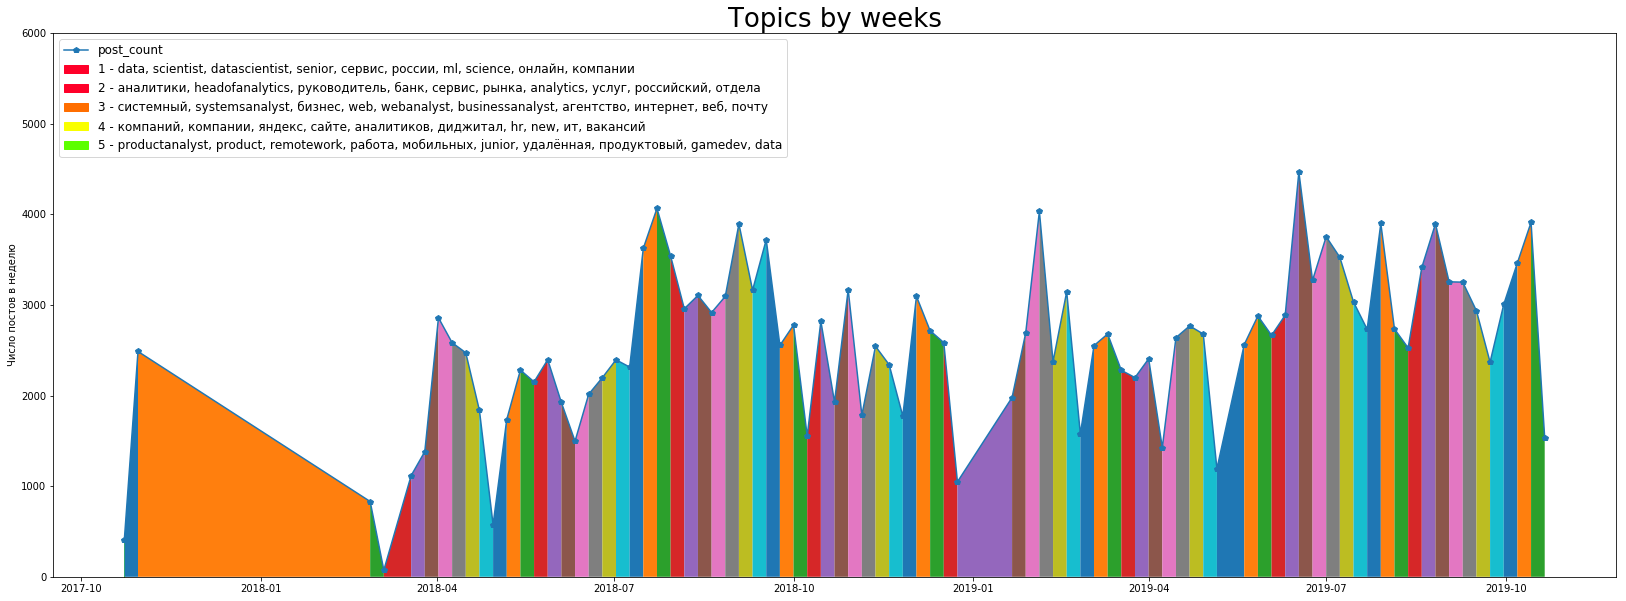

In [134]:
import matplotlib as mpl
cmap = mpl.cm.gist_rainbow
normalize = mpl.colors.Normalize(vmin=1, vmax=10)
cmap(normalize(3))

plt.figure(figsize=(28,10))
plt.plot(topic_dynamic.date, topic_dynamic.post_count, '-p')

for topic_index in range(lda_norm_45.num_topics):
    plt.fill_between(
        y1=0, y2=topic_dynamic.post_count[:1], 
        x=topic_dynamic.date.values[:1], 
        color=cmap(normalize(topic_index)),
        label = '{0} - {1}'.format(topic_index + 1, ', '.join(list(zip(*lda_norm_45.show_topic(topic_index, topn=10)))[0]))
    )
for step in range(topic_dynamic.shape[0]):
    plt.fill_between(
        y1=0, y2=topic_dynamic.post_count[step: step+2], 
        x=topic_dynamic.date.values[step: step+2], 
        #color=cmap(normalize(topic_dynamic.topic.iloc[step])),
    )

plt.ylim(0, 6000)
plt.legend(fontsize=12, loc='upper left')
plt.ylabel('Число постов в неделю')
plt.title('Topics by weeks', fontsize=26)
plt.savefig('topic_history.png')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,make_scorer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import os
import scikitplot as skplt
import seaborn as sns
import time

In [38]:
def plot_top_ngrams(text,ngrams=(1,1),top=10,max_features=100,color='rgba(0,255,255,0.5)'):
    cv=CountVectorizer(ngram_range=ngrams,max_features=max_features)
    trans_text=cv.fit_transform(text)
    col_sum=trans_text.sum(axis=0)
    word_index=[(word,col_sum[0,idx]) for word,idx in cv.vocabulary_.items()]
    sorted_word_index=sorted(word_index,key=lambda x:x[1],reverse=True)
    top_words_index=sorted_word_index[:top]
    top_words=[element[0] for element in top_words_index]
    counts=[element[1] for element in top_words_index]
    df = pd.DataFrame(zip(top_words,counts))
    df.columns = ['top_words', 'counts']
    df.set_index('top_words', inplace=True)
    df.sort_values('counts', ascending=False)
    df.plot(y='counts', kind='bar', legend=False)

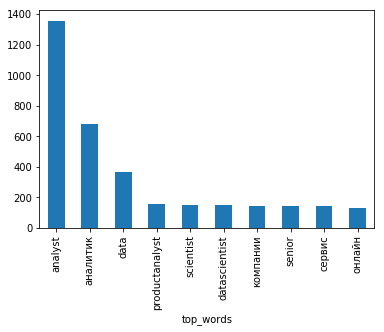

In [39]:
plot_top_ngrams(corpus.text,ngrams=(1,1),top=10,color='rgba(128,0,0,0.5)')

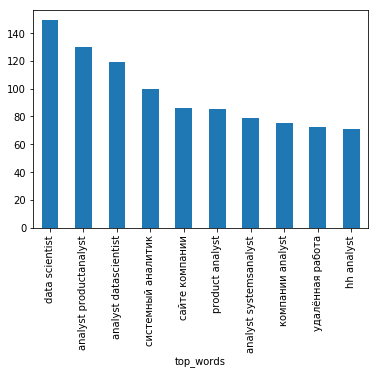

In [40]:
plot_top_ngrams(corpus.text,ngrams=(2,2),top=10,color='rgba(128,0,0,0.5)')

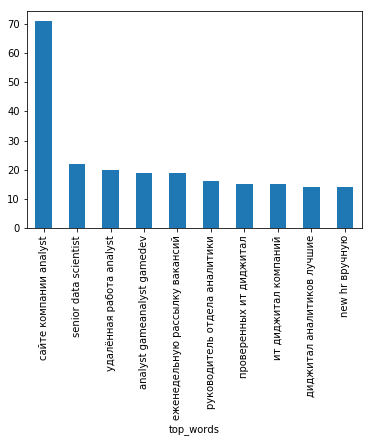

In [41]:
plot_top_ngrams(corpus.text,ngrams=(3,3),top=10,color='rgba(128,128,128,0.5)')

In [43]:
X = corpus.text

In [44]:
cv = CountVectorizer(ngram_range=(1,2), analyzer='word')
train_X_cv = cv.fit_transform(X.values)

In [45]:
tsvd = TruncatedSVD(n_components=50, random_state=42)
train_X_svd = tsvd.fit_transform(train_X_cv)
tsne = TSNE(n_components=2, random_state=42)
train_X_tsne = tsne.fit_transform(train_X_svd)

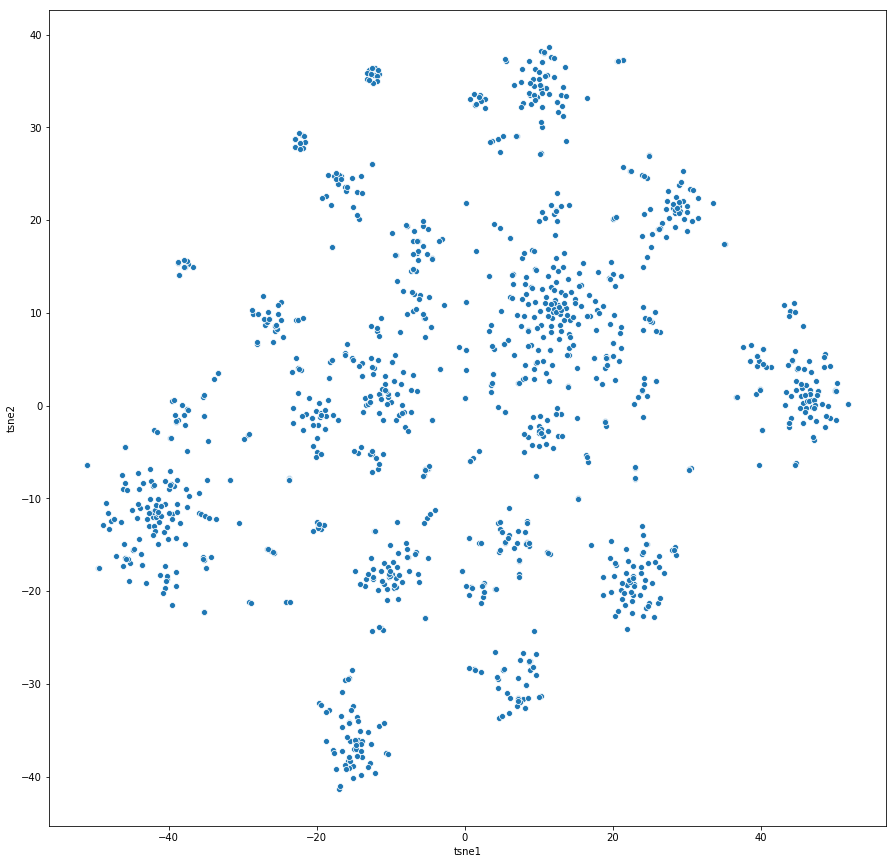

In [47]:
df = pd.DataFrame()
df["tsne1"] = pd.Series(train_X_tsne[:, 0])
df["tsne2"] = pd.Series(train_X_tsne[:, 1])
plt.figure(figsize=(15, 15))
sns.scatterplot(
    df["tsne1"], df["tsne2"], data=df
)
plt.show()